In [1]:
# Import warnings library
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fu
import numpy as np
import statsmodels.formula.api as smf

from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D


# Import Data

In [2]:
df = pd.read_csv('Cleandata.csv') # save csv
df_list_of_neighbors = pd.read_csv('list_of_neighbors.csv') 
print(df.shape)

(2904709, 43)


In [3]:
df = df.loc[(df['log_price'] >= 0)]
df.shape

(2881686, 43)

In [4]:
df = df[df.Tax_diff != 0]
df.shape

(2850721, 43)

In [5]:
len(df.Kommune.value_counts())

61

In [6]:
list_of_neighbors = []
for i in range(df_list_of_neighbors.shape[0]):
    row = df_list_of_neighbors.iloc[i]
    list_of_neighbors.append((row['0'], row['1']))

# Create picture of the kernel function


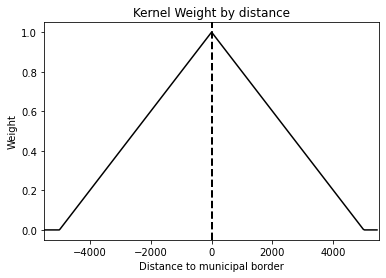

In [7]:
dfk = df[df.Neighbors_set == str(list_of_neighbors[1])]
dfk = dfk[dfk.Year == 2021]
dfk = dfk.sort_values(by=['Distance_sign'])

plt.plot(dfk['Distance_sign'], fu.kernel(dfk['Distance_sign'], c=0, h=5000), c='black')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.xlabel('Distance to municipal border')
plt.ylabel("Weight")
plt.xlim([-5500,5500])
plt.title("Kernel Weight by distance")
plt.savefig('kernel.png')
plt.show()

# Formula

In [8]:

for i in df.columns:
    if i.__contains__(' '):
        j = i.replace(" ", "_")
        j = j.replace(',','')
        j = j.replace('-','_')
        j = j.replace('.','')
        j = j.replace('(','')
        j = j.replace(')','')
        j = j.replace('&','n')
        
        df = df.rename(columns={i:j})


In [9]:
col_list =df.columns.to_list()[7:]
col_list.remove('log_price')
col_list.remove('Neighbors_set')
col_list.remove('Grundskylds_promille_nabo')
col_list.remove('Tax_diff')
col_list.remove('Border_dummy')
cols = '+'.join(col_list)

In [10]:
long ="log_price~Distance_sign*Border_dummy"+ '+'+cols
short = "log_price~Distance_sign*Border_dummy"

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

def areg(formula,data=None,absorb=None,cluster=None): 

    y,X = patsy.dmatrices(formula,data,return_type='dataframe')

    ybar = y.mean()
    y = y -  y.groupby(data[absorb]).transform('mean') + ybar

    Xbar = X.mean()
    X = X - X.groupby(data[absorb]).transform('mean') + Xbar

    reg = sm.OLS(y,X)
    # Account for df loss from FE transform
    reg.df_resid -= (data[absorb].nunique() - 1)

    return reg.fit(cov_type='cluster',cov_kwds={'groups':data[cluster].values})

# Local RDs

In [12]:
Parametric_s = fu.RDD(df, list_of_neighbors, short)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [13]:
Parametric_l = fu.RDD(df, list_of_neighbors, long)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 5
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 15
  warnings.warn('covariance of constraints does not have f

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have fu

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

In [14]:
Tri_s = fu.RDD(df,list_of_neighbors, short, kernel_w =True)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [15]:
Tri_l = fu.RDD(df,list_of_neighbors, long, kernel_w =True)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 5
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have f

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 7
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have fu

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have ful

# Estimations

In [16]:
Parametric_s

,coef,std err,z,P>|z|,[0.025,0.975],Tax_diffs,n
København_Frederiksberg_2007,-0.1176,1.900000e-14,-6.170000e+12,0.0,-0.118,-0.118,-7.00,9288
København_Frederiksberg_2008,-0.0093,5.820000e-15,-1.590000e+12,0.0,-0.009,-0.009,-7.00,5838
København_Frederiksberg_2009,-0.1442,5.930000e-15,-2.430000e+13,0.0,-0.144,-0.144,-7.00,6027
København_Frederiksberg_2010,0.7510,6.940000e-14,1.080000e+13,0.0,0.751,0.751,-7.00,7841
København_Frederiksberg_2011,2.1135,1.690000e-13,1.250000e+13,0.0,2.114,2.114,-7.00,6821
...,...,...,...,...,...,...,...,...
Kolding_Vejle_2008,0.7400,5.720000e-13,1.290000e+12,0.0,0.740,0.740,-2.75,1610
Kolding_Vejle_2017,-0.9214,3.270000e-13,-2.820000e+12,0.0,-0.921,-0.921,-2.75,1658
Kolding_Vejle_2019,0.0673,1.090000e-13,6.170000e+11,0.0,0.067,0.067,-2.75,1974
Kolding_Vejle_2020,-0.0078,9.830000e-15,-7.960000e+11,0.0,-0.008,-0.008,-2.75,1898


In [17]:
res_sharp_s, tap_sharp_s= fu.reg(Parametric_s)
tap_sharp_s = fu.table_col_RD(tap_sharp_s)

In [18]:
res_sharp_l, tap_sharp_l= fu.reg(Parametric_l)
tap_sharp_l= fu.table_col_RD(tap_sharp_l)

In [19]:
res_Tri_s, tab_Tri_s = fu.reg(Tri_s)
tab_Tri_s  = fu.table_col_RD(tab_Tri_s)

In [20]:
res_Tri_l, tab_Tri_l = fu.reg(Tri_l)
tab_Tri_l = fu.table_col_RD(tab_Tri_l)

In [21]:
results = pd.concat([tap_sharp_s, tap_sharp_l,tab_Tri_s, tab_Tri_l],axis=1)
results

,0,0,0,0
Intercept,-0.0341,0.0234,-0.0341,0.0234
,(0.029),(0.043),(0.029),(0.043)
Tax_diffs,$-0.017^{***}$,-0.0045,$-0.017^{***}$,-0.0045
,(0.005),(0.008),(0.005),(0.008)


In [22]:
controls =['⁒','$\checkmark$']*2
n = [Parametric_s.shape[0], Parametric_l.shape[0], Tri_s.shape[0] , Tri_l.shape[0] ]
obs = [Parametric_s.n.sum(), Parametric_l.n.sum(), Tri_s.n.sum(), Tri_l.n.sum()]
results.loc[len(results)] = controls
results.loc[len(results)] = n
results.loc[len(results)] = obs

In [23]:
results

,0,0,0,0
Intercept,-0.0341,0.0234,-0.0341,0.0234
,(0.029),(0.043),(0.029),(0.043)
Tax_diffs,$-0.017^{***}$,-0.0045,$-0.017^{***}$,-0.0045
,(0.005),(0.008),(0.005),(0.008)
4,⁒,$\checkmark$,⁒,$\checkmark$
5,1309,1309,1309,1309
6,2454633,2454633,2454633,2454633


In [24]:
results.index = results.index[:4].to_list()+ ['Controls', 'n', 'obs']
print(results.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               0 &             0 &               0 &             0 \\
\midrule
Intercept &         -0.0341 &        0.0234 &         -0.0341 &        0.0234 \\
          &         (0.029) &       (0.043) &         (0.029) &       (0.043) \\
Tax\_diffs &  \$-0.017\textasciicircum \{***\}\$ &       -0.0045 &  \$-0.017\textasciicircum \{***\}\$ &       -0.0045 \\
          &         (0.005) &       (0.008) &         (0.005) &       (0.008) \\
Controls  &               ⁒ &  \$\textbackslash checkmark\$ &               ⁒ &  \$\textbackslash checkmark\$ \\
n         &            1309 &          1309 &            1309 &          1309 \\
obs       &         2454633 &       2454633 &         2454633 &       2454633 \\
\bottomrule
\end{tabular}



# Plot estimations


## Sharp 

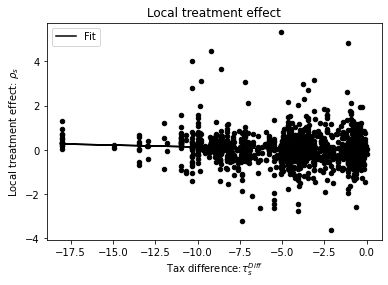

In [25]:


ax = Parametric_s.plot.scatter(x='Tax_diffs', y="coef", color='black')

Parametric_s.assign(predictions=res_sharp_s.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference:$ \tau_s^{Diff} $ ')
plt.ylabel(r"Local treatment effect: $ \rho_s $")


plt.savefig('regplot_ps.png')
plt.show()

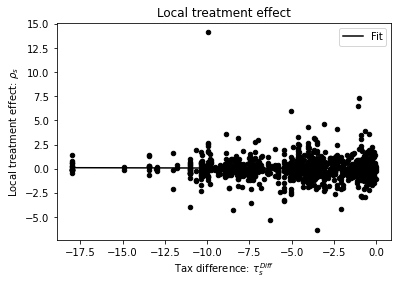

In [26]:

Parametric_l= Parametric_l.sort_values(by=['Tax_diffs'])
ax = Parametric_l.plot.scatter(x='Tax_diffs', y="coef", color='black')

Parametric_l.assign(predictions=res_sharp_l.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $\tau_s^{Diff}$ ')
plt.ylabel(r"Local treatment effect: $\rho_s$ ")


plt.savefig('regplot_pl.png')
plt.show()

## Triangular


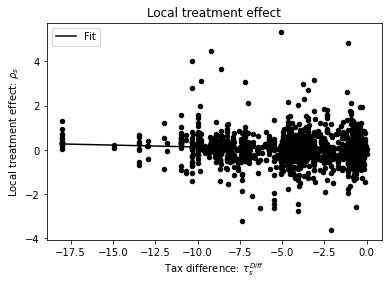

In [27]:
Tri_s=Tri_s.sort_values(by=['Tax_diffs'])

ax = Tri_s.plot.scatter(x='Tax_diffs', y="coef", color='black')

Tri_s.assign(predictions=res_Tri_s.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $\tau_s^{Diff} $')
plt.ylabel(r"Local treatment effect: $ \rho_s $")


plt.savefig('regplot_ts.png')
plt.show()

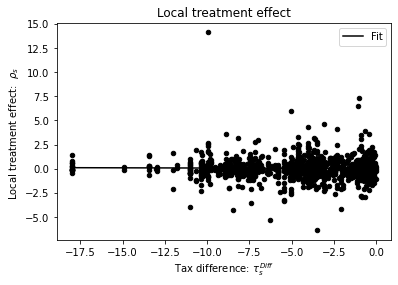

In [28]:

Tri_l=Tri_l.sort_values(by=['Tax_diffs'])

ax = Tri_l.plot.scatter(x='Tax_diffs', y="coef", color='black')

Tri_l.assign(predictions=res_Tri_l.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $ \tau_s^{Diff}$ ')
plt.ylabel(r"Local treatment effect:  $ \rho_s$  ")


plt.savefig('regplot_tl.png')
plt.show()

# Examine København vs. Frederiksberg 2021

In [29]:
df_ = df[df.Neighbors_set == str(list_of_neighbors[0])]
df_ = df_[df_.Year == 2021]
df_ = df_.sort_values(by=['Distance_sign'])

k = fu.kernel(df_["Distance_sign"], c=0, h=5000)

In [30]:


model_parametric = smf.wls(short, df_, missing='drop').fit(cov_type='cluster', cov_kwds={'groups': df_['Kommune']})

model_as_html_parametric  = model_parametric.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_parametric, header=0, index_col=0)[0].round(3)
tab_par_s = fu.table_col_RD(tab)


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [31]:

model_parametric_l = smf.wls(long, df_, missing='drop').fit(cov_type='cluster', cov_kwds={'groups': df_['Kommune']})

model_as_html_parametric_l  = model_parametric_l.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_parametric_l, header=0, index_col=0)[0].round(3)
tab_par_l = fu.table_col_RD(tab).iloc[:8]
tab

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.454,0.175,65.560,0.000,11.112,11.796
Distance_sign,0.000,0.000,67.385,0.000,0.000,0.000
Border_dummy,0.040,0.002,20.051,0.000,0.036,0.043
Distance_sign:Border_dummy,0.000,0.000,75.849,0.000,0.000,0.000
Distance,0.000,0.000,87.225,0.000,0.000,0.000
Enhedsareal,-0.015,0.000,-955.138,0.000,-0.015,-0.015
Antal_badeværelser,-0.162,0.045,-3.581,0.000,-0.250,-0.073
Beboelsesareal,0.022,0.000,1185.299,0.000,0.022,0.022
Værelser,0.081,0.006,14.240,0.000,0.070,0.092
Antal_toiletter,0.056,0.004,12.914,0.000,0.047,0.064


In [32]:
df_

,Unnamed:_0,Adresse,Pris,Year,Kommune,Nabo,Grundskylds_promille,Distance,Enhedsareal,Antal_badeværelser,...,Anvendelse_Stuehus_til_landbrugsejendom,Toiletforhold_Intet_vandskyllende_toilet,Toiletforhold_Vandskyllende_toilet_i_enheden,Toiletforhold_Vandskyllende_toilet_uden_for_enheden,Energikode_230_V_el_fra_værk,Energikode_400_V_el_fra_værk,Energikode_Både_230_V_el_og_gas_fra_værk,Energikode_Både_400_V_el_og_gas_fra_værk,Energikode_Gas_fra_værk,Energikode_Hverken_el_eller_gas_fra_værk
371496,371496,"Robert Jacobsens Vej 89, 2. tv 2300 København S",5500000.0,2021,København,Frederiksberg,34.00,6430.411611,100,1,...,0,0,1,0,0,1,0,0,0,0
364422,364422,"Robert Jacobsens Vej 89, 10 2300 København S",7400000.0,2021,København,Frederiksberg,34.00,6430.411611,145,1,...,0,0,1,0,0,1,0,0,0,0
364891,364891,"Robert Jacobsens Vej 89, 9 2300 København S",8000000.0,2021,København,Frederiksberg,34.00,6430.411611,145,1,...,0,0,1,0,0,1,0,0,0,0
393889,393889,"Robert Jacobsens Vej 89, 3. tv 2300 København S",5450000.0,2021,København,Frederiksberg,34.00,6430.411611,106,1,...,0,0,1,0,0,1,0,0,0,0
389675,389675,"Robert Jacobsens Vej 86, 2. 2 2300 København S",6000000.0,2021,København,Frederiksberg,34.00,6426.172427,117,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146571,146571,"Howitzvej 41, 3. th 2000 Frederiksberg",3600000.0,2021,Frederiksberg,København,24.75,1356.911801,64,1,...,0,0,1,0,0,0,0,0,0,0
145331,145331,"Porcelænshaven 2A, st. th 2000 Frederiksberg",5445000.0,2021,Frederiksberg,København,24.75,1365.439370,86,1,...,0,0,1,0,0,1,0,0,0,0
144951,144951,"Solvej 2, 4. tv 2000 Frederiksberg",9695000.0,2021,Frederiksberg,København,24.75,1406.412308,150,1,...,0,0,1,0,0,0,0,0,0,0
145290,145290,"Solvej 2, 4. th 2000 Frederiksberg",9600000.0,2021,Frederiksberg,København,24.75,1406.412308,147,1,...,0,0,1,0,0,0,0,0,0,0


In [33]:
model_nonparametric = smf.wls(short, df_,weights=k).fit(cov_type='cluster', cov_kwds={'groups': df_['Kommune']})
model_as_html_nonparametric = model_nonparametric.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_nonparametric, header=0, index_col=0)[0].round(3)
tab_tri_s = fu.table_col_RD(tab)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [34]:
model_nonparametric_l = smf.wls(long, df_,weights=k).fit(cov_type='cluster', cov_kwds={'groups': df_['Kommune']})
model_as_html_nonparametric_l = model_nonparametric_l.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_nonparametric_l, header=0, index_col=0)[0].round(3)
tab_tri_l = fu.table_col_RD(tab).iloc[:8]
tab_tri_l

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 4
  warnings.warn('covariance of constraints does not have full '


,0
Intercept,$11.506^{***}$
,(0.18)
Distance_sign,$0.0^{***}$
,(0.0)
Border_dummy,$0.06^{***}$
,(0.005)
Distance_sign:Border_dummy,$0.0^{***}$
,(0.0)


In [35]:
results_RD = pd.concat([tab_par_s, tab_par_l,tab_tri_s, tab_tri_l],axis=1)
results_RD

,0,0,0,0
Intercept,$15.248^{***}$,$11.454^{***}$,$15.206^{***}$,$11.506^{***}$
,(0.0),(0.175),(0.0),(0.18)
Distance_sign,$0.0^{***}$,$0.0^{***}$,$-0.0^{***}$,$0.0^{***}$
,(0.0),(0.0),(0.0),(0.0)
Border_dummy,$0.191^{***}$,$0.04^{***}$,$0.23^{***}$,$0.06^{***}$
,(0.0),(0.002),(0.0),(0.005)
Distance_sign:Border_dummy,$0.0^{***}$,$0.0^{***}$,$0.0^{***}$,$0.0^{***}$
,(0.0),(0.0),(0.0),(0.0)


In [36]:
controls =['⁒','$\checkmark$']*2
n = [df_.shape[0]]*4
results_RD.loc[len(results_RD)] = controls
results_RD.loc[len(results_RD)] = n
results_RD

,0,0,0,0
Intercept,$15.248^{***}$,$11.454^{***}$,$15.206^{***}$,$11.506^{***}$
,(0.0),(0.175),(0.0),(0.18)
Distance_sign,$0.0^{***}$,$0.0^{***}$,$-0.0^{***}$,$0.0^{***}$
,(0.0),(0.0),(0.0),(0.0)
Border_dummy,$0.191^{***}$,$0.04^{***}$,$0.23^{***}$,$0.06^{***}$
,(0.0),(0.002),(0.0),(0.005)
Distance_sign:Border_dummy,$0.0^{***}$,$0.0^{***}$,$0.0^{***}$,$0.0^{***}$
,(0.0),(0.0),(0.0),(0.0)
8,⁒,$\checkmark$,⁒,$\checkmark$
9,10252,10252,10252,10252


In [37]:
results_RD.index = results_RD.index[:8].to_list()+ ['Controls', 'n']
print(results_RD.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               0 &               0 &               0 &               0 \\
\midrule
Intercept                  &  \$15.248\textasciicircum \{***\}\$ &  \$11.454\textasciicircum \{***\}\$ &  \$15.206\textasciicircum \{***\}\$ &  \$11.506\textasciicircum \{***\}\$ \\
                           &           (0.0) &         (0.175) &           (0.0) &          (0.18) \\
Distance\_sign              &     \$0.0\textasciicircum \{***\}\$ &     \$0.0\textasciicircum \{***\}\$ &    \$-0.0\textasciicircum \{***\}\$ &     \$0.0\textasciicircum \{***\}\$ \\
                           &           (0.0) &           (0.0) &           (0.0) &           (0.0) \\
Border\_dummy               &   \$0.191\textasciicircum \{***\}\$ &    \$0.04\textasciicircum \{***\}\$ &    \$0.23\textasciicircum \{***\}\$ &    \$0.06\textasciicircum \{***\}\$ \\
                           &           (0.0) &         (0.002) &           (0.0) &         (0.005) \\
Distance\_sign:Border\_dumm

# Discountinuity plot


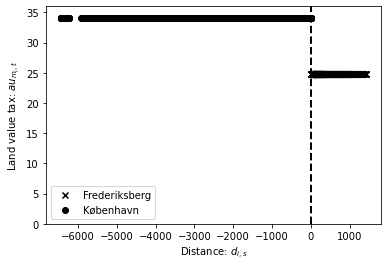

In [38]:
df_f = df_[df_.Kommune == 'Frederiksberg']
df_k = df_[df_.Kommune == 'København']

plt.scatter(df_f.Distance_sign, df_f.Grundskylds_promille, c='black', marker ='x', label = 'Frederiksberg')
plt.scatter(df_k.Distance_sign, df_k.Grundskylds_promille, c='black', label = 'København')
plt.ylim([0,36])
plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Land value tax: $\tau_{m_i,t}$")
plt.legend(loc='lower left')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)

plt.savefig('discount.png')
plt.show()

In [39]:

def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)

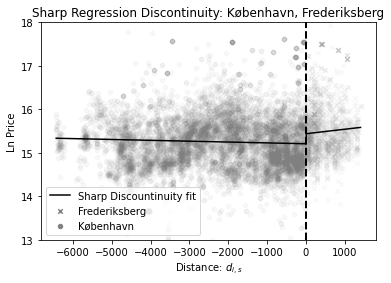

In [40]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.05)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.05)

df_.assign(predictions=model_nonparametric.fittedvalues).plot(x='Distance_sign', y="predictions", ax=ax, color = 'black', label = 'Sharp Discountinuity fit' )

plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Sharp Regression Discontinuity: {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='lower left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)
plt.ylim((13, 18))
plt.savefig('regplot1.png')
plt.show()


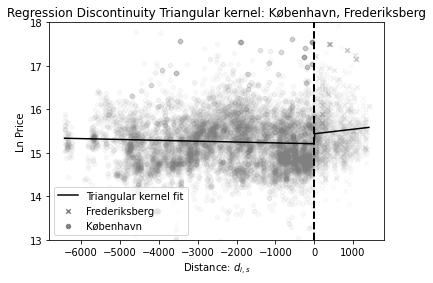

In [41]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.05)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.05)
df_.assign(predictions=model_nonparametric.fittedvalues).plot(x="Distance_sign", y="predictions", ax=ax, color="black", label = 'Triangular kernel fit')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Regression Discontinuity Triangular kernel: {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='lower left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)
plt.ylim((13, 18))
plt.savefig('regplot2.png')
plt.show()


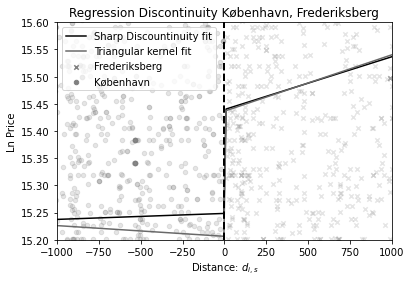

In [42]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.2)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.2)
df_.assign(predictions=model_parametric.fittedvalues).plot(x='Distance_sign', y="predictions", ax=ax, color = 'black', label = 'Sharp Discountinuity fit' )
df_.assign(predictions=model_nonparametric.fittedvalues).plot(x="Distance_sign", y="predictions", ax=ax, color="dimgrey", label = 'Triangular kernel fit')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Regression Discontinuity {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='upper left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)

plt.xlim((-1000,1000))
plt.ylim(15.2,15.6)
plt.savefig('regplot3.png')
plt.show()
